In [1]:
!nvidia-smi

Mon Jul 24 20:40:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 6.2 MB/s eta 0:00:00


In [3]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 74.4MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 12.8MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 89.0ms
Speed: 18.4ms preprocess, 89.0ms inference, 36.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/EshanSengupta/YOLOv8_2

/content/drive/MyDrive/EshanSengupta/YOLOv8_2


In [9]:
!ls

data  data.yaml  runs  yolov8s.pt


In [10]:
%cd /content/drive/MyDrive/EshanSengupta/YOLOv8_2
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=220  plots=True

/content/drive/MyDrive/EshanSengupta/YOLOv8_2
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=220, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [12]:
!ls runs/detect/train11

args.yaml					    train_batch120.jpg
confusion_matrix.png				    train_batch121.jpg
events.out.tfevents.1690231385.9986f733f259.2965.0  train_batch122.jpg
F1_curve.png					    train_batch1.jpg
P_curve.png					    train_batch2.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


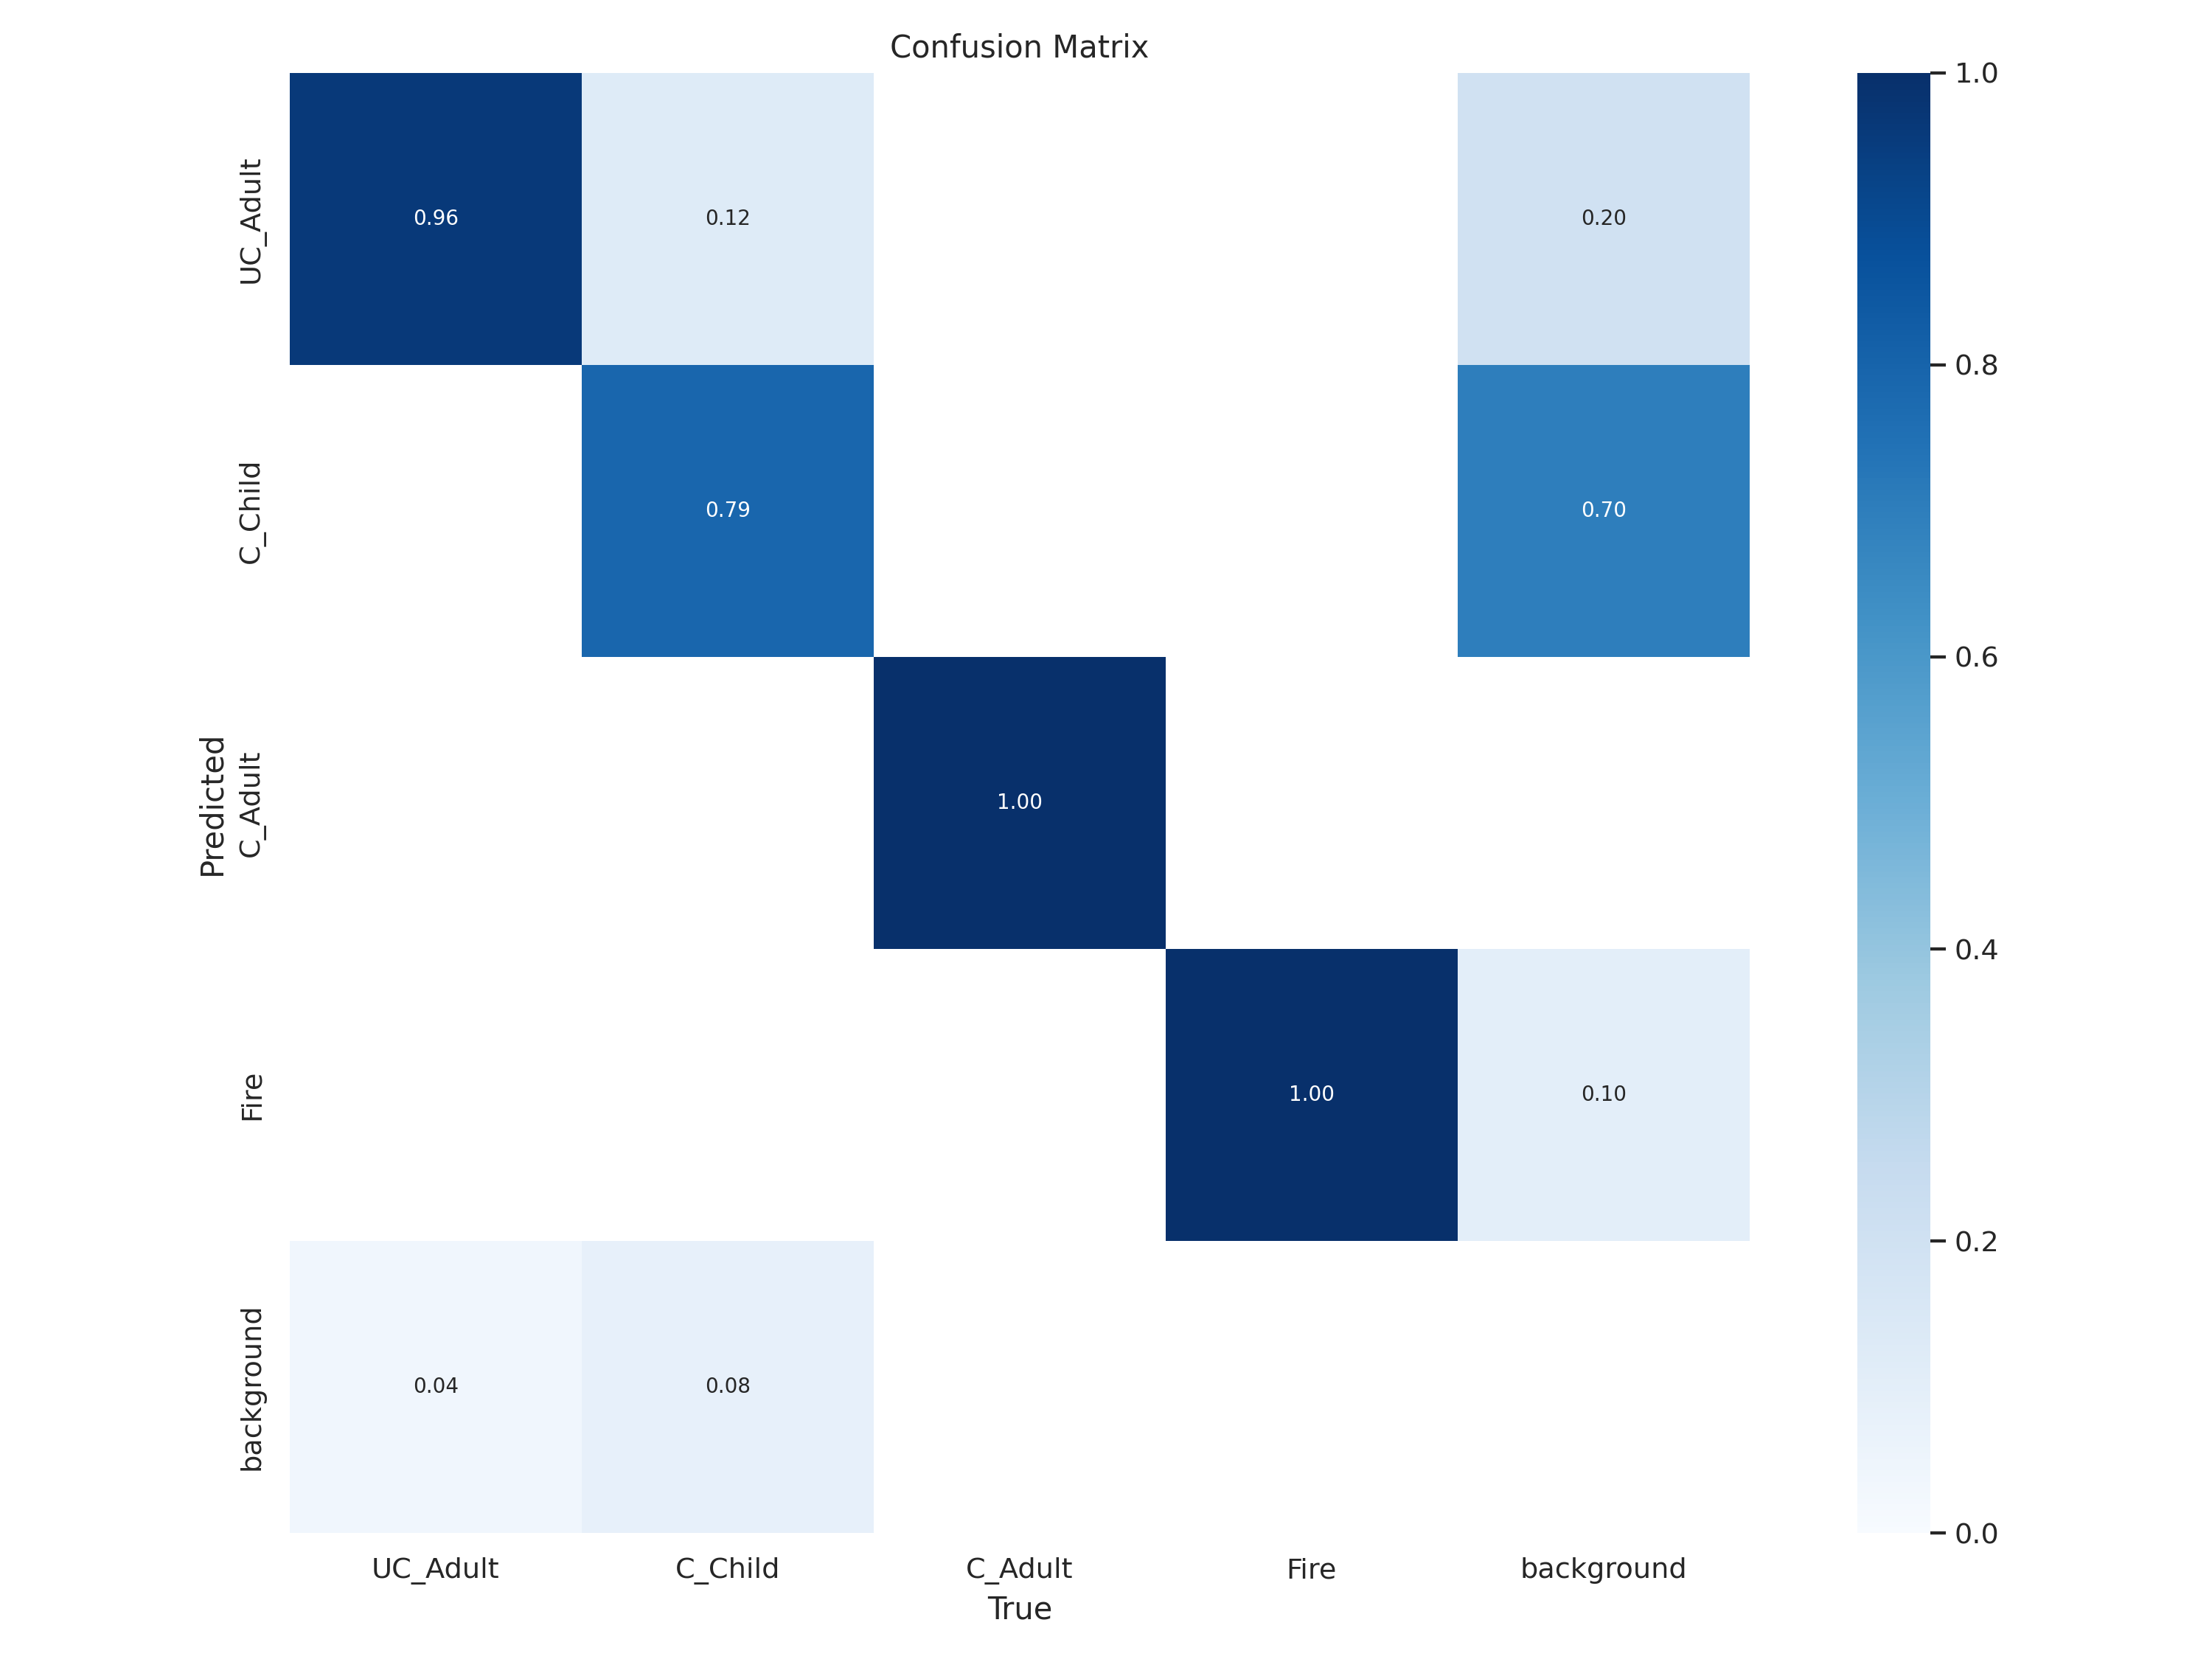

In [13]:
Image(filename='runs/detect/train11/confusion_matrix.png', width=600)

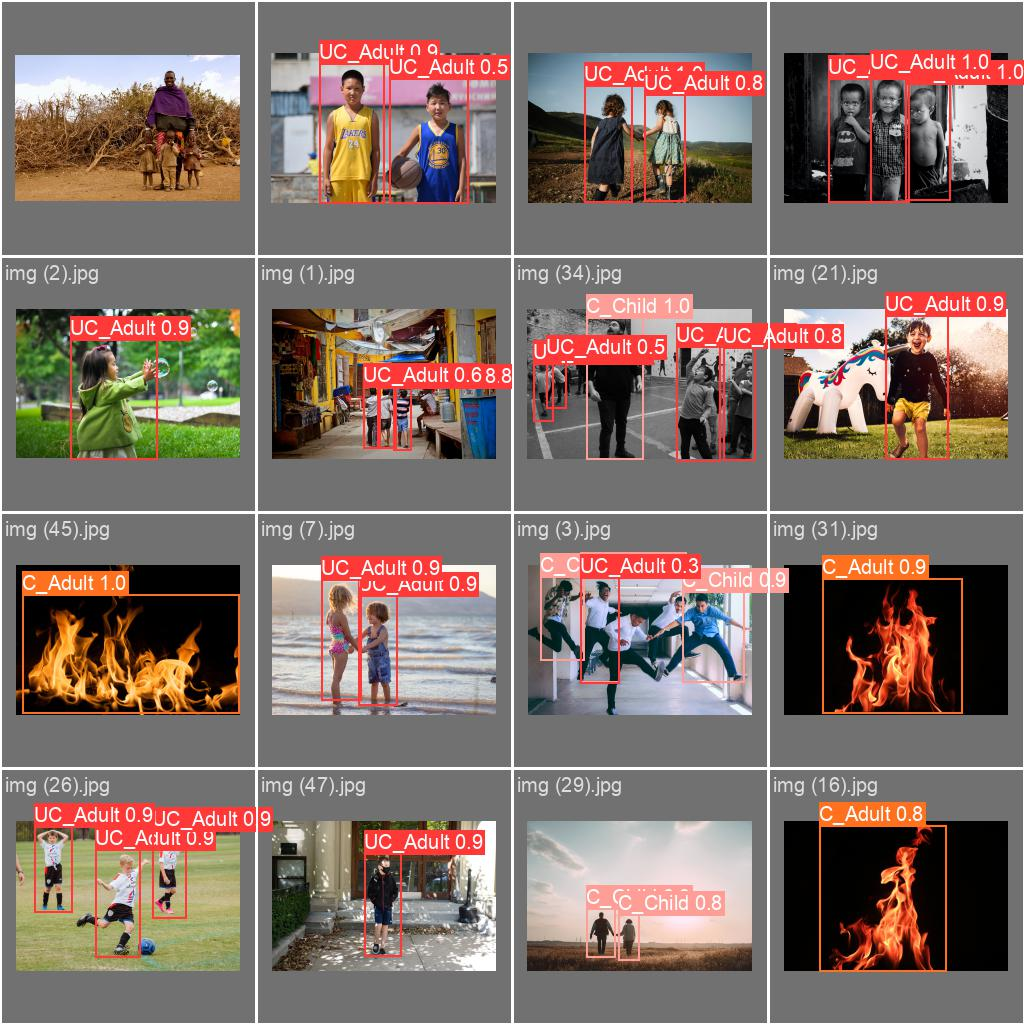

In [17]:
Image(filename='runs/detect/train11/val_batch0_pred.jpg', width=1000)

In [15]:
!yolo task=detect mode=val model=runs/detect/train11/weights/best.pt data=data.yaml

2023-07-24 21:47:45.061154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 21:47:46.009935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/EshanSengupta/YOLOv8_2/data/valid/labels.cache... 48 images, 2 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:24<00:00,  6.11s/it]
                   all         50         70      0.819       0.97      0.973      0.758
              UC_Adult         5

In [16]:
!yolo task=detect mode=predict model=runs/detect/train11/weights/best.pt conf=0.25 source=data/test/images

2023-07-24 21:48:22.865920: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 21:48:23.810534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/26 /content/drive/MyDrive/EshanSengupta/YOLOv8_2/data/test/images/img (1).jpg: 160x224 2 UC_Adults, 69.6ms
image 2/26 /content/drive/MyDrive/EshanSengupta/YOLOv8_2/data/test/images/img (2).jpg: 160x224 1 UC_Adult, 7.5ms
image 3/26 /content/drive/MyDrive/EshanSengupta/YOLOv8_2/data/test/images/img (3).jpg: 160x224 5 UC_Adults, 1 C_Child, 7.7ms
image 4/26 /content/drive/MyDrive/EshanSengu